In [48]:
from glob import glob
import numpy as np
import os
import gdal
from matplotlib import pyplot as plt
from src.segtools import export_tif
import subprocess
import time
import re
%matplotlib inline

In [83]:
modeldirc = '/contents/predictions/processed/v1-00'
ref = np.array(sorted(glob('%s/*.tif'%(modeldirc))))
z = np.argsort(np.array([int(c.split('_')[2]) for c in ref]))
ref = list(ref[z])

['/contents/predictions/processed/v1-00/HotC_polyimage_0_USDA_NAIP_DOQQ_m_3711501_ne_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_1_USDA_NAIP_DOQQ_m_3711501_nw_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_2_USDA_NAIP_DOQQ_m_3711501_se_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_3_USDA_NAIP_DOQQ_m_3711501_sw_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_4_USDA_NAIP_DOQQ_m_3711502_nw_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_5_USDA_NAIP_DOQQ_m_3711502_sw_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_6_USDA_NAIP_DOQQ_m_3711509_ne_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_7_USDA_NAIP_DOQQ_m_3711509_nw_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_8_USDA_NAIP_DOQQ_m_3711510_nw_11_1_20150725.tif', '/contents/predictions/processed/v1-00/HotC_polyimage_9_USDA_NA

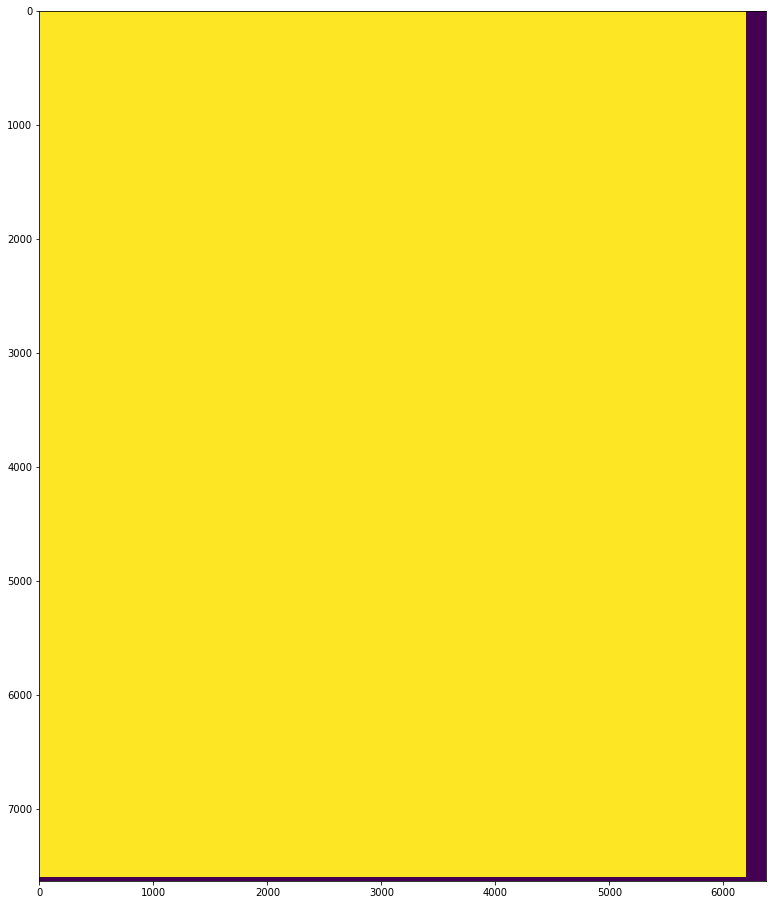

In [106]:
im = (np.moveaxis(gdal.Open(ref[0]).ReadAsArray(), 0, -1))[:,:,-1]
#bin_im = np.zeros(np.shape(im)).astype('bool')
#thr = 0.02
#bin_im[im>thr]=True
#col_edge = np.argmax(np.all(bin_im,axis = 0))
#row_edge = np.argmax(np.all(bin_im,axis = 1))
f, ax = plt.subplots(1,1,figsize=(16,16))
#ax.imshow(im)
mask = np.ones(np.shape(im))
mask[im==0] = 0
ax.imshow(mask)

In [ ]:
outdirc = '%s/classified/%s'%(modeldirc,int(thr*100))
if (not os.path.exists(outdirc)):
    os.mkdir(outdirc) 
outname = '%s/%s'%(outdirc, os.path.basename(ref[0]))
export_tif(bin_im, gdal.Open(ref[0]), outname)

In [111]:
mosaic_file = '%s/mosaic.vrt'%(modeldirc)
mosaic_cmd = "gdalbuildvrt -srcnodata 0 %s %s/*.tif"%(mosaic_file, modeldirc)
#mosaic_cmd = "gdalbuildvrt %s %s"%(mosaic_file, ' '.join(ref))
tile_cmd = "python ./src/gdal2tiles2.py --processes 7 -z 4-17 -v %s %s/tiles"%(mosaic_file, modeldirc)
print(mosaic_cmd)
print(tile_cmd)

gdalbuildvrt -srcnodata 0 /contents/predictions/processed/v1-00/mosaic.vrt /contents/predictions/processed/v1-00/*.tif
python ./src/gdal2tiles2.py --processes 7 -z 4-17 -v /contents/predictions/processed/v1-00/mosaic.vrt /contents/predictions/processed/v1-00/tiles


In [112]:
start = time.time()
p = subprocess.Popen(mosaic_cmd, stdout=subprocess.PIPE, \
                     stderr=subprocess.STDOUT, shell=True)
stdout, stderr = p.communicate()
print(stdout)
p = subprocess.Popen(tile_cmd, stdout=subprocess.PIPE, \
                     stderr=subprocess.STDOUT, shell=True)
#stdout, stderr = p.communicate()
#print(stdout)
print(time.time() - start)

b'0...10...20...30...40...50...60...70...80...90...100 - done.\n'


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [120]:
cmd='gsutil'
p = subprocess.Popen(cmd, stdout=subprocess.PIPE, \
                     stderr=subprocess.STDOUT, shell=True)
stdout, stderr = p.communicate()
print(stdout)

b'gsutil requires python 2.7.\n'


In [121]:
%%bash
pip3 install google-cloud-storage --upgrade

Requirement already up-to-date: google-cloud-storage in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: google-auth>=1.2.0 in /usr/local/lib/python3.5/dist-packages (from google-cloud-storage)
Requirement already up-to-date: google-resumable-media>=0.3.1 in /usr/local/lib/python3.5/dist-packages (from google-cloud-storage)
Requirement already up-to-date: requests>=2.18.0 in /usr/local/lib/python3.5/dist-packages (from google-cloud-storage)
Requirement already up-to-date: google-cloud-core<0.29dev,>=0.28.0 in /usr/local/lib/python3.5/dist-packages (from google-cloud-storage)
Requirement already up-to-date: google-api-core<0.2.0dev,>=0.1.1 in /usr/local/lib/python3.5/dist-packages (from google-cloud-storage)
Requirement already up-to-date: pyasn1-modules>=0.2.1 in /usr/local/lib/python3.5/dist-packages (from google-auth>=1.2.0->google-cloud-storage)
Requirement already up-to-date: six>=1.9.0 in /usr/local/lib/python3.5/dist-packages (from google-auth>=1.2.0->google